In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#LOAD THE DATA SET
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa


In [3]:
#DELETING ID COLUMN
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Species'].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Data Analysis 

<Axes: >

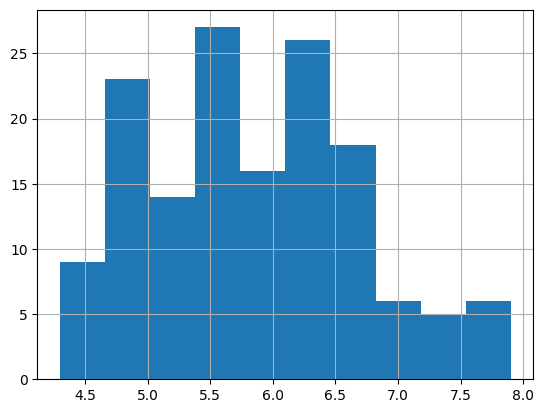

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

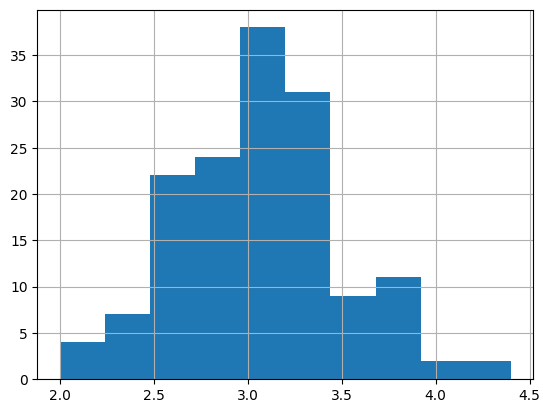

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

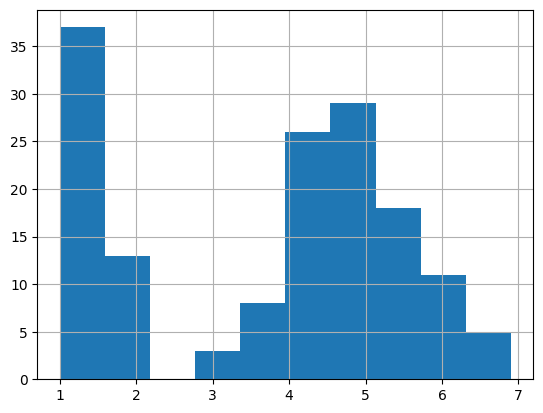

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

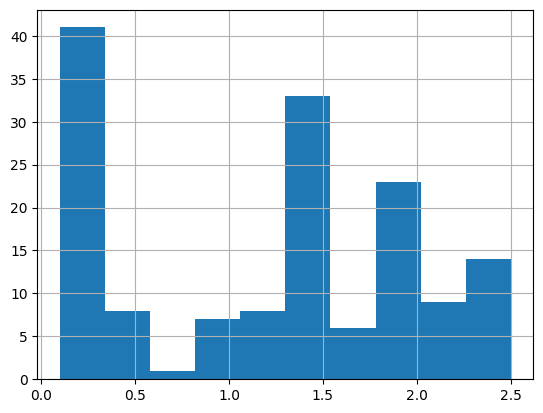

In [12]:
df['PetalWidthCm'].hist()

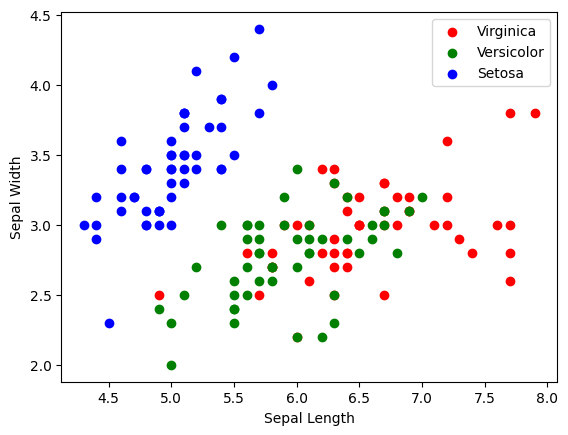

In [13]:
colours = ['red', 'green', 'blue']
species = ['Virginica', 'Versicolor', 'Setosa']
for i in range(0,3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colours[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

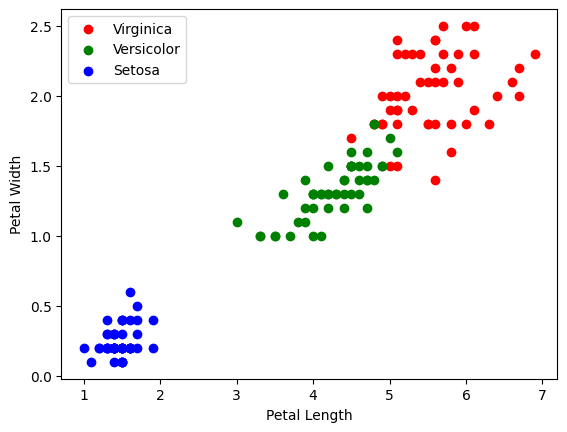

In [14]:
colours = ['red', 'green', 'blue']
species = ['Virginica', 'Versicolor', 'Setosa']
for i in range(0,3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colours[i], label=species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

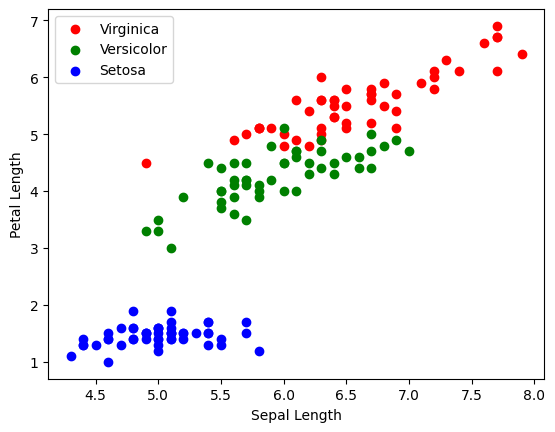

In [15]:
colours = ['red', 'green', 'blue']
species = ['Virginica', 'Versicolor', 'Setosa']
for i in range(0,3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colours[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

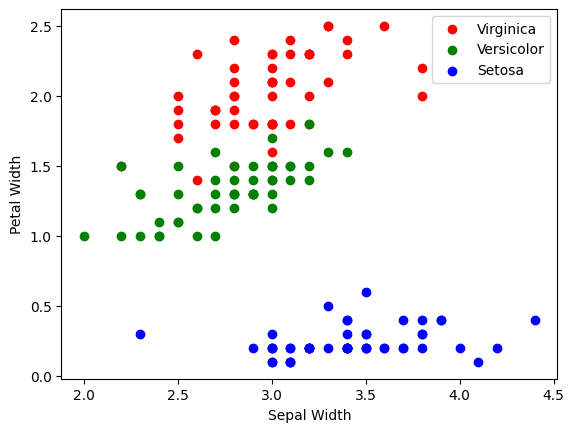

In [16]:
colours = ['red', 'green', 'blue']
species = ['Virginica', 'Versicolor', 'Setosa']
for i in range(0,3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colours[i], label=species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

In [17]:
#CORRELATION MATRIX

In [18]:
numeric_df = df.select_dtypes(include=['number'])

numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce').dropna()

correlation_matrix = numeric_df.corr()

numeric_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

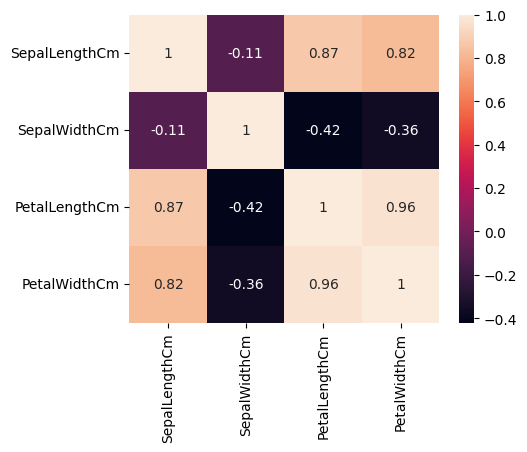

In [19]:
corr = numeric_df.corr()

#HEATMAP
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax = ax)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test)*100)

Logistic Regression Accuracy:  97.77777777777777


In [22]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("K Neighbours Classifier Accuracy: ", model.score(x_test, y_test)*100)

K Neighbours Classifier Accuracy:  95.55555555555556


In [23]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Decision Tree Classifier Accuracy: ", model.score(x_test, y_test)*100)

Decision Tree Classifier Accuracy:  97.77777777777777


In [24]:
import pickle
filename = 'FinalModel.sav'
pickle.dump(model,open(filename, 'wb'))

In [25]:
filename = 'FinalModel.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model Saved Successully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model Saved Successully.


In [26]:
load_model = pickle.load(open(filename, 'rb'))

In [27]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Versicolor'], dtype=object)